**Detection of Social Network Spam Based on Improved Machine Learning**

1. Import Libraries

In [23]:
import pandas as pd
from sklearn import model_selection
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection
from scipy import stats
import joblib

2. Import dataset

In [24]:
df = pd.read_csv("dataset_1.csv")

Display Heads

In [25]:
df.head(2)

,account_age,no_follower,no_following,no_userfavourites,no_lists,no_tweets,no_retweets,no_hashtag,no_usermention,no_urls,no_char,no_digits,label
0,0,120,211,3,0,180,1,1,2,1,94,1,spammer
1,707,624,428,2507,0,12881,0,0,0,1,99,6,spammer


Describe the dataset

In [26]:
df.describe()

,account_age,no_follower,no_following,no_userfavourites,no_lists,no_tweets,no_retweets,no_hashtag,no_usermention,no_urls,no_char,no_digits
count,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000
mean,659.090100,2.787160e+03,1080.706100,730.414800,21.605600,1.425985e+04,499.717900,0.499400,0.391800,1.071500,65.24600,2.257800
std,528.596058,3.832586e+04,10281.993514,4310.692861,348.569682,3.712682e+04,5142.156412,1.029226,0.714243,0.328022,31.94595,3.970858
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000
25%,177.000000,1.900000e+01,62.000000,0.000000,0.000000,5.577500e+02,0.000000,0.000000,0.000000,1.000000,41.00000,0.000000
50%,574.000000,2.230000e+02,266.000000,8.000000,0.000000,2.846500e+03,0.000000,0.000000,0.000000,1.000000,61.00000,0.000000
75%,1017.000000,6.995000e+02,726.000000,182.250000,2.000000,1.284900e+04,0.000000,1.000000,1.000000,1.000000,91.00000,4.000000
max,2589.000000,1.879442e+06,738060.000000,165706.000000,26958.000000,1.036464e+06,115372.000000,14.000000,7.000000,6.000000,140.00000,56.000000


Display information of the dataset

In [27]:
df.info

<bound method DataFrame.info of       account_age  no_follower  no_following  no_userfavourites  no_lists  \
0               0          120           211                  3         0   
1             707          624           428               2507         0   
2             121            1           515                  0         0   
3             260            5            23                  0         0   
4             624          983           159                 11         2   
...           ...          ...           ...                ...       ...   
9995          366          258           218                219         0   
9996         1559         4592            90                127       107   
9997          909           45           238                  6         0   
9998          354         3807          3723                114        11   
9999          808           21            37                  7         0   

      no_tweets  no_retweets  no_hashtag  n

Display the shape (No. of rows and columns) of the dataset

In [28]:
df.shape

(10000, 13)

Check the null values in the dataset

In [29]:
df.isnull().sum()

account_age          0
no_follower          0
no_following         0
no_userfavourites    0
no_lists             0
no_tweets            0
no_retweets          0
no_hashtag           0
no_usermention       0
no_urls              0
no_char              0
no_digits            0
label                0
dtype: int64

Print number of Features and no of samples

In [30]:
print('Number of features: {}'.format(df.shape[1]))
print('Number of examples: {}'.format(df.shape[0]))

Number of features: 13
Number of examples: 10000


**3. Data Visualization**

**Scatter Plot**

1. account_age VS no_tweets

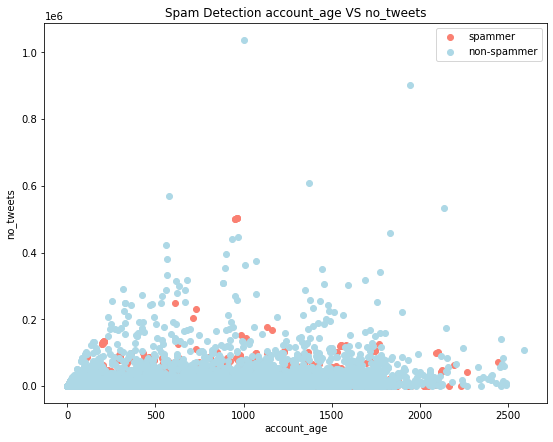

In [31]:
import matplotlib.pyplot as plt
# Create another figure
plt.figure(figsize=(9, 7))

# Scatter with postivie examples
plt.scatter(df.account_age[df.label =="spammer"],
            df.no_tweets[df.label=="spammer"],
            c="salmon")

# Scatter with negative examples
plt.scatter(df.account_age[df.label =="non-spammer"],
            df.no_tweets[df.label =="non-spammer"],
            c="lightblue")

# Add some helpful info
plt.title("Spam Detection account_age VS no_tweets")
plt.xlabel("account_age")
plt.ylabel("no_tweets")
plt.legend(["spammer", "non-spammer"]);

2. account_age VS no_tweets

3. account_age VS no_tweets

**Correlation Matrix**

(12.5, -0.5)

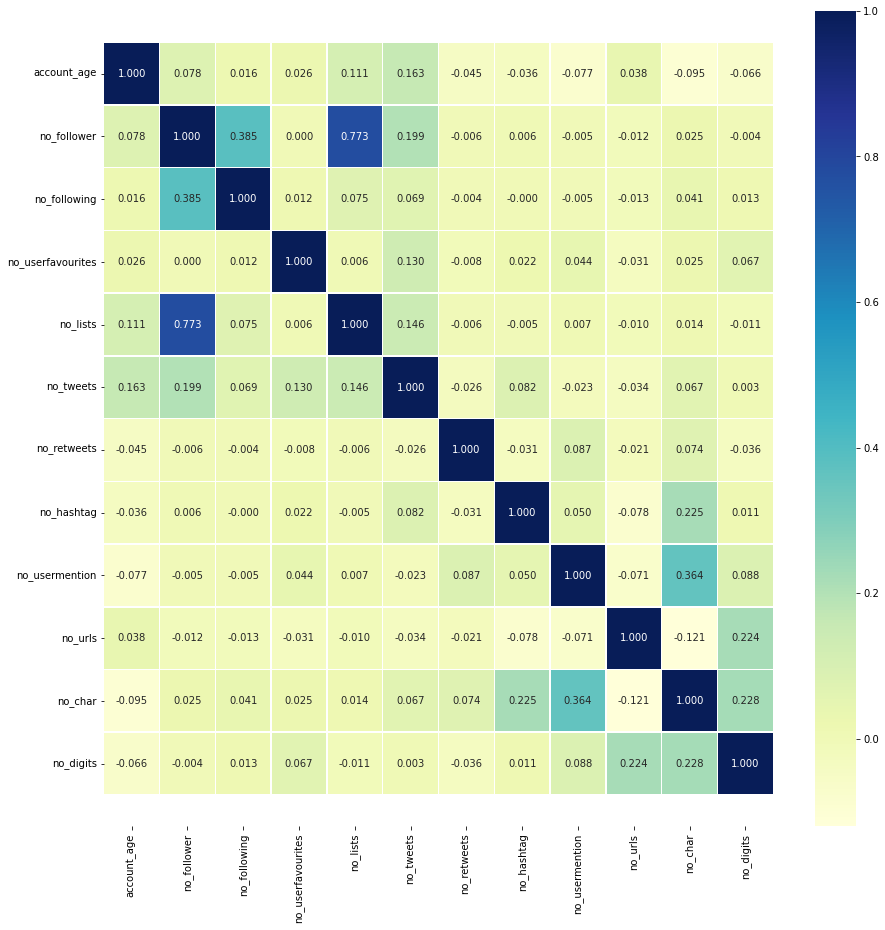

In [32]:
# Let's make our correlation matrix a little prettier
import seaborn as sns
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 15))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".3f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

Count Number Positive and Negative samples

In [33]:
print(df['label'].value_counts())

spammer        5000
non-spammer    5000
Name: label, dtype: int64


**4. Dataset Splitting**

In [34]:
def read_dataset(filename):
    return model_selection.train_test_split(df.drop(['label'], axis=1), df["label"], train_size=0.8)

In [35]:
Xtrain, Xtest, Ytrain, Ytest = read_dataset(df)

In [36]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

**5. Claasification using Machine Learning Algorithm**

**A. SVM**

In [37]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


svm_clf = make_pipeline(StandardScaler(), SVC())
svm_clf.fit(Xtrain, Ytrain)
predictions = svm_clf.predict(Xtest)

print('Predictions: \n', predictions)
print('\nConfusion matrix: \n', confusion_matrix(Ytest, predictions))
print('\nEvaluation metrics: \n',classification_report(Ytest, predictions))

print_score(svm_clf, Xtrain, Ytrain, Xtest, Ytest, train=True)
print_score(svm_clf, Xtrain, Ytrain, Xtest, Ytest, train=False)
joblib.dump(svm_clf, 'svm_clf.sav') 

Predictions: 
 ['spammer' 'spammer' 'non-spammer' ... 'spammer' 'spammer' 'spammer']

Confusion matrix: 
 [[669 340]
 [116 875]]

Evaluation metrics: 
               precision    recall  f1-score   support

 non-spammer       0.85      0.66      0.75      1009
     spammer       0.72      0.88      0.79       991

    accuracy                           0.77      2000
   macro avg       0.79      0.77      0.77      2000
weighted avg       0.79      0.77      0.77      2000

Train Result:
Accuracy Score: 76.09%
_______________________________________________
CLASSIFICATION REPORT:
           non-spammer      spammer  accuracy    macro avg  weighted avg
precision     0.835594     0.713703  0.760875     0.774649      0.774512
recall        0.648208     0.873036  0.760875     0.760622      0.760875
f1-score      0.730069     0.785370  0.760875     0.757719      0.757782
support    3991.000000  4009.000000  0.760875  8000.000000   8000.000000
_______________________________________________


['svm_clf.sav']

**B. KNN**

In [41]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=10, weights='distance', p=1)
clf_knn = make_pipeline(StandardScaler(), neigh)
clf_knn.fit(Xtrain, Ytrain)
predictions = clf_knn.predict(Xtest)

print('Predictions: \n', predictions)
print('\nConfusion matrix: \n', confusion_matrix(Ytest, predictions))
print('\nEvaluation metrics: \n',classification_report(Ytest, predictions))

print_score(clf_knn, Xtrain, Ytrain, Xtest, Ytest, train=True)
print_score(clf_knn, Xtrain, Ytrain, Xtest, Ytest, train=False)

joblib.dump(clf_knn, 'clf_knn.sav') 

Predictions: 
 ['spammer' 'non-spammer' 'non-spammer' ... 'spammer' 'spammer' 'spammer']

Confusion matrix: 
 [[749 260]
 [137 854]]

Evaluation metrics: 
               precision    recall  f1-score   support

 non-spammer       0.85      0.74      0.79      1009
     spammer       0.77      0.86      0.81       991

    accuracy                           0.80      2000
   macro avg       0.81      0.80      0.80      2000
weighted avg       0.81      0.80      0.80      2000

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
           non-spammer  spammer  accuracy  macro avg  weighted avg
precision          1.0      1.0       1.0        1.0           1.0
recall             1.0      1.0       1.0        1.0           1.0
f1-score           1.0      1.0       1.0        1.0           1.0
support         3991.0   4009.0       1.0     8000.0        8000.0
_______________________________________________
Confusion Matrix: 
 [[399

['clf_knn.sav']

**C. Decision Tree**

In [42]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(Xtrain, Ytrain)

print('Predictions: \n', predictions)
print('\nConfusion matrix: \n', confusion_matrix(Ytest, predictions))
print('\nEvaluation metrics: \n',classification_report(Ytest, predictions))

print_score(tree_clf, Xtrain, Ytrain, Xtest, Ytest, train=True)
print_score(tree_clf, Xtrain, Ytrain, Xtest, Ytest, train=False)

joblib.dump(tree_clf, 'clf_dt.sav') 

Predictions: 
 ['spammer' 'non-spammer' 'non-spammer' ... 'spammer' 'spammer' 'spammer']

Confusion matrix: 
 [[749 260]
 [137 854]]

Evaluation metrics: 
               precision    recall  f1-score   support

 non-spammer       0.85      0.74      0.79      1009
     spammer       0.77      0.86      0.81       991

    accuracy                           0.80      2000
   macro avg       0.81      0.80      0.80      2000
weighted avg       0.81      0.80      0.80      2000

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
           non-spammer  spammer  accuracy  macro avg  weighted avg
precision          1.0      1.0       1.0        1.0           1.0
recall             1.0      1.0       1.0        1.0           1.0
f1-score           1.0      1.0       1.0        1.0           1.0
support         3991.0   4009.0       1.0     8000.0        8000.0
_______________________________________________
Confusion Matrix: 
 [[399

['clf_dt.sav']

**D. Random Forest**

In [43]:
from sklearn.ensemble import RandomForestClassifier
rand_for = RandomForestClassifier(criterion='entropy', n_estimators=100)
clf_rf = make_pipeline(StandardScaler(), rand_for)
clf_rf.fit(Xtrain, Ytrain)
predictions = clf_rf.predict(Xtest)

print('Predictions: \n', predictions)
print('\nConfusion matrix: \n', confusion_matrix(Ytest, predictions))
print('\nEvaluation metrics: \n',classification_report(Ytest, predictions))

print_score(clf_rf, Xtrain, Ytrain, Xtest, Ytest, train=True)
print_score(clf_rf, Xtrain, Ytrain, Xtest, Ytest, train=False)

joblib.dump(clf_rf, 'clf_rf.sav') 

Predictions: 
 ['non-spammer' 'non-spammer' 'non-spammer' ... 'spammer' 'spammer'
 'spammer']

Confusion matrix: 
 [[915  94]
 [149 842]]

Evaluation metrics: 
               precision    recall  f1-score   support

 non-spammer       0.86      0.91      0.88      1009
     spammer       0.90      0.85      0.87       991

    accuracy                           0.88      2000
   macro avg       0.88      0.88      0.88      2000
weighted avg       0.88      0.88      0.88      2000

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
           non-spammer  spammer  accuracy  macro avg  weighted avg
precision          1.0      1.0       1.0        1.0           1.0
recall             1.0      1.0       1.0        1.0           1.0
f1-score           1.0      1.0       1.0        1.0           1.0
support         3991.0   4009.0       1.0     8000.0        8000.0
_______________________________________________
Confusion Matrix: 
 

['clf_rf.sav']